# **IMPORTING THE LIBRARIES**

In [1]:
from tensorflow import keras 

In [40]:
import pandas as pd
import numpy as pn
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lightgbm import plot_importance
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import seaborn as sns
from keras.utils import np_utils
from keras.models import model_from_json


import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.optimizers import  Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
#from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

# **LOADING THE DATASET**

In [5]:
listapixel=[f'pixel_{x}'for x in range(784)]
listapixel= ['target']+listapixel

In [6]:
data= pd.read_csv('A_Z Handwritten Data.csv', names= listapixel)

# EXPLORATORY DATA ANALYSIS

In [7]:
data.head()

,target,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


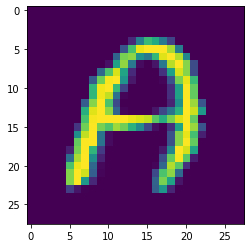

In [8]:
plt.imshow(data.iloc[2,1:].to_numpy().reshape(28,28))

# DATA PREPARATION


In [9]:
X=data.drop('target', axis=1)
y=data['target']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

#X_train = X_train.to_numpy().reshape(X_train.shape[0], 28, 28, 1).astype('float32')
#X_test = X_test.to_numpy().reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [9]:
y.value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13870
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: target, dtype: int64

In [ ]:
lgb = LGBMClassifier(max_depth=3, n_estimators=50, colsample_bytree=.33, n_jobs=-1)
lgb.fit(X_train,Y_train)

In [ ]:
fig, ax = plt.subplots(figsize=(20,30) )
sns.heatmap(confusion_matrix(Y_test,lgb.predict(X_test)), annot= True, fmt='g')

In [ ]:
plot_confusion_matrix(lgb, X_test, Y_test, values_format='.0f')

# Classification Using CNN

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28,1))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28,1))

#X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)).astype('float32')

X_train=X_train/255
X_test=X_test/255

num_classes = len(y.unique())

y_train=np_utils.to_categorical(y_train, num_classes=num_classes, dtype='int')
y_test=np_utils.to_categorical(y_test, num_classes=num_classes, dtype='int')



In [31]:
model = Sequential()

model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

model.add(Flatten()) # transforma a imagem 28 x 28 em 1D para entrada

model.add(Dense(128,activation ="relu")) #camda ocultacom 128 neuronios
model.add(Dense(64,activation ="relu")) # camada oculta com 64 neuronios
model.add(Dense(32,activation ="relu")) # camada oculta com 32 neuronios

model.add(Dense(num_classes,activation ="softmax", name='predict')) #camada de saída

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy']) # loss é a função de perda devemos diminuir este valor
model.summary()

#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=18, batch_size=200, verbose=2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               649088    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)               

In [32]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size =200 )

Epoch 1/10
1490/1490 [==============================] - 75s 50ms/step - loss: 0.2947 - accuracy: 0.9185 - val_loss: 0.1021 - val_accuracy: 0.9710
Epoch 2/10
1490/1490 [==============================] - 80s 53ms/step - loss: 0.0945 - accuracy: 0.9728 - val_loss: 0.0784 - val_accuracy: 0.9776
Epoch 3/10
1490/1490 [==============================] - 84s 56ms/step - loss: 0.0709 - accuracy: 0.9794 - val_loss: 0.0634 - val_accuracy: 0.9823
Epoch 4/10
1490/1490 [==============================] - 88s 59ms/step - loss: 0.0575 - accuracy: 0.9830 - val_loss: 0.0565 - val_accuracy: 0.9841
Epoch 5/10
1490/1490 [==============================] - 89s 59ms/step - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0523 - val_accuracy: 0.9850
Epoch 6/10
1490/1490 [==============================] - 87s 59ms/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.0465 - val_accuracy: 0.9867
Epoch 7/10
1490/1490 [==============================] - 87s 58ms/step - loss: 0.0357 - accuracy: 0.9888 - val_loss: 0.0456 -

# Save Model

In [36]:
model_json=model.to_json()
with open ('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('letter.h5')

# Load Model

In [41]:
json_file = open ('model.json', 'r')
loaded_model_json= json_file.read()
json_file.close()

loaded_model= model_from_json(loaded_model_json)
loaded_model.load_weights('letter.h5')

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

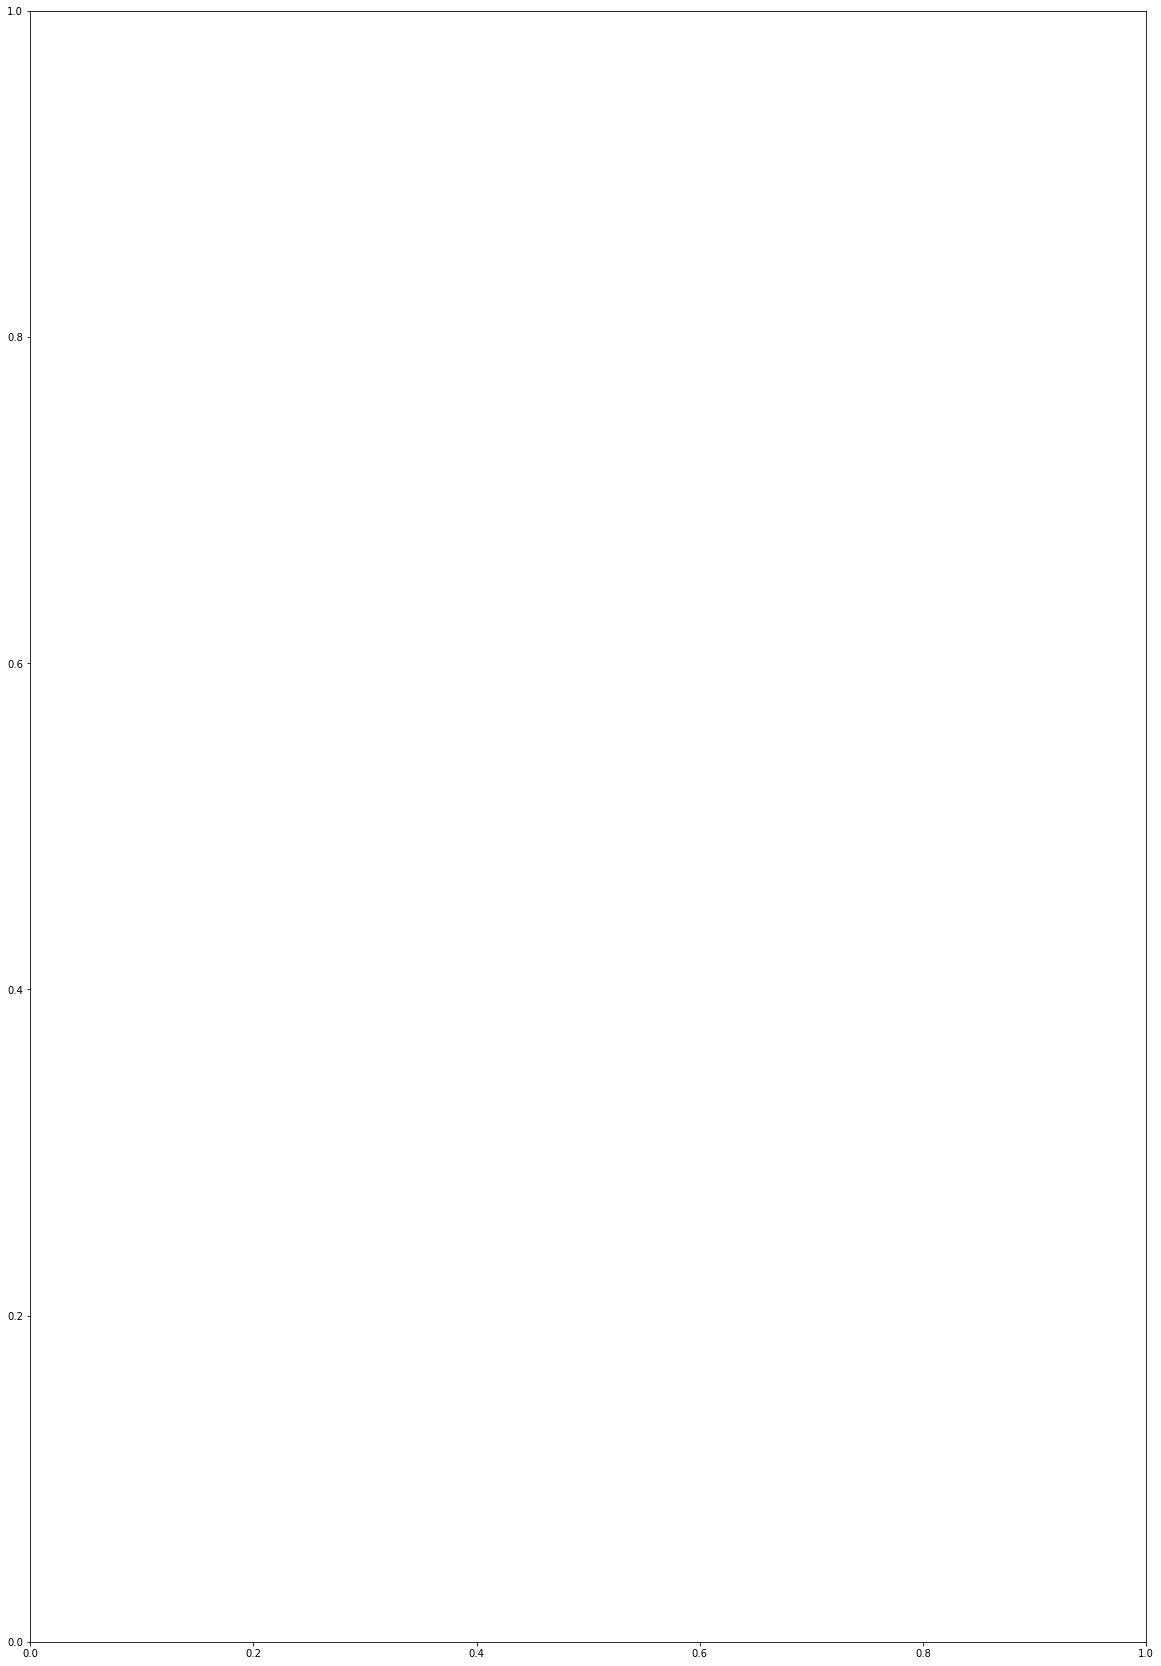

In [35]:
fig, ax = plt.subplots(figsize=(20,30) )
sns.heatmap(confusion_matrix(Y_test,model.predict(X_test)), annot= True, fmt='g')

In [ ]:
model.evaluate(X_test,y_test, verbose=0)

In [34]:
data

,target,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
